# Machine Learning Dashboard

### Load the Data

In [1]:
import pandas as pd
import numpy as np
from time import time
%matplotlib inline
# Import supplementary visualization code visuals.py
pd.options.display.max_colwidth=200
data_frame=pd.read_table(
        '/Users/panda/Documents/mlnd/smsspamcollection/SMSSpamCollection',
        sep='\t', header=None, names=['lable','sms_text'])
data_frame.head()

,lable,sms_text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


### Data Visualization

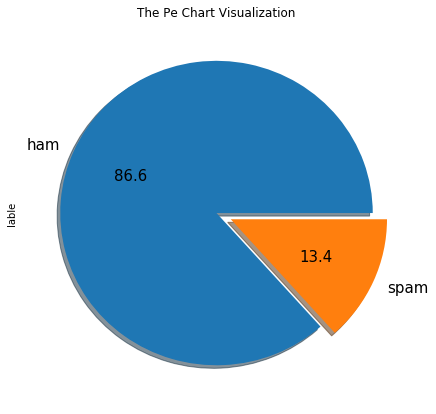

In [2]:
explode = (0,0.1)
data_frame.lable.value_counts().plot(kind='pie',figsize=(7,7),autopct='%1.1f',shadow=True,
                               title='The Pe Chart Visualization',explode=explode,fontsize=15)

### Transform Categorical Data into Numerical Data

In [3]:
data_frame['lable']=data_frame.lable.map({'ham':0,'spam':1})
data_frame.head()

,lable,sms_text
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives around here though"


### Split the Data for Training and Testing

In [4]:
# Split the 'features' and 'lable' data into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data_frame['sms_text'],
                                               data_frame['lable'],
                                               test_size = 0.2,
                                               random_state=1)
# Display the results of the split
print ("Training set has {} samples.".format(x_train.shape[0]))
print ("Testing set has {} samples.".format(x_test.shape[0]))

Training set has 4457 samples.
Testing set has 1115 samples.


### Construct Document Term Matrix 

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec=CountVectorizer()
traing_data=count_vec.fit_transform(x_train) # traiing data
testing_data=count_vec.transform(x_test) # test data
x_train_dense=traing_data.todense()
x_test_dense=testing_data.todense()

### Fit the Classifier

In [6]:
from sklearn.naive_bayes import MultinomialNB
mutliNBClassifier=MultinomialNB()
mutliNBClassifier.fit(traing_data,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Perform Prediction

In [31]:
predictions=mutliNBClassifier.predict(testing_data)

### Calculate Metrics

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))
accuracy=accuracy_score(y_test, predictions)
fscore=f1_score(y_test, predictions)

Accuracy score:  0.9901345291479821
Precision score:  0.9788732394366197
Recall score:  0.9455782312925171
F1 score:  0.9619377162629758


In [50]:
# Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

requires_dense_array=['QuadraticDiscriminantAnalysis','GaussianNB','GaussianProcessClassifier','GradientBoostingClassifier']

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test, x_train_dense, x_test_dense,describe): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    training_start = time() # Get start time
    if(learner.__class__.__name__ in requires_dense_array):
        learner.fit(x_train_dense[:sample_size],y_train[:sample_size])
    else:
        learner.fit(X_train[:sample_size],y_train[:sample_size])
    training_end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = training_end-training_start
        
    # Get the predictions on the test set(X_test),
    # then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    if(learner.__class__.__name__ in requires_dense_array):
        predictions_test = learner.predict(x_test_dense)
        predictions_train = learner.predict(x_train_dense[:sample_size])
    else:
        predictions_test = learner.predict(X_test)
        predictions_train = learner.predict(X_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end-start
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:sample_size], predictions_train[:sample_size])
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:sample_size], predictions_train,beta=0.5)
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # Success
    if(describe):
        print ("{} trained on {} samples with accuracy {}%".
               format(learner.__class__.__name__, sample_size,(100.0*results['acc_test'])))
    #print (results)
    # Return the results
    return results

In [51]:
final_results={}
def metrics_visualization(clfs,describe):
    results = {}
    samples_100 = len(y_train)
    samples_10 = int((samples_100*0.1))
    samples_1 = int((samples_100*0.01))
    for clf in clfs:
        clf_name = clf.__class__.__name__
        results[clf_name] = {}
        final_results[clf_name] = {}
        for i, samples in enumerate([samples_1, samples_10, samples_100]):
            results[clf_name][i] = \
            train_predict(clf, samples, traing_data, y_train, testing_data, y_test,
                          x_train_dense, x_test_dense,describe)
            final_results[clf_name][i]= results[clf_name][i]

    # Run metrics visualization for the three supervised learning models chosen
    evaluate(results)

In [35]:
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")
# Display inline matplotlib plots with IPython
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
###########################################

import matplotlib.pyplot as pl
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score, accuracy_score
def evaluate(results):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """
  
    # Create figure
    fig, ax = pl.subplots(2, 3, figsize = (20,8))

    # Constants
    bar_width = 0.19
    colors = ['#F55826','#00A0A0','#E5B506','#284ABC','#59A857']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(3):
                
                # Creative plot code
                ax[j//3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[j//3, j%3].set_xlabel("Training Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    
    # Add titles
    ax[0, 0].set_title("Model Training Time")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Prediction Time")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    pl.legend(handles = patches, bbox_to_anchor = (-.80, 2.55), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    # Aesthetics
    pl.suptitle("Performance Metrics of Supervised Learning Models", fontsize = 18, y = 1.10)
    pl.tight_layout()
    pl.show()
    

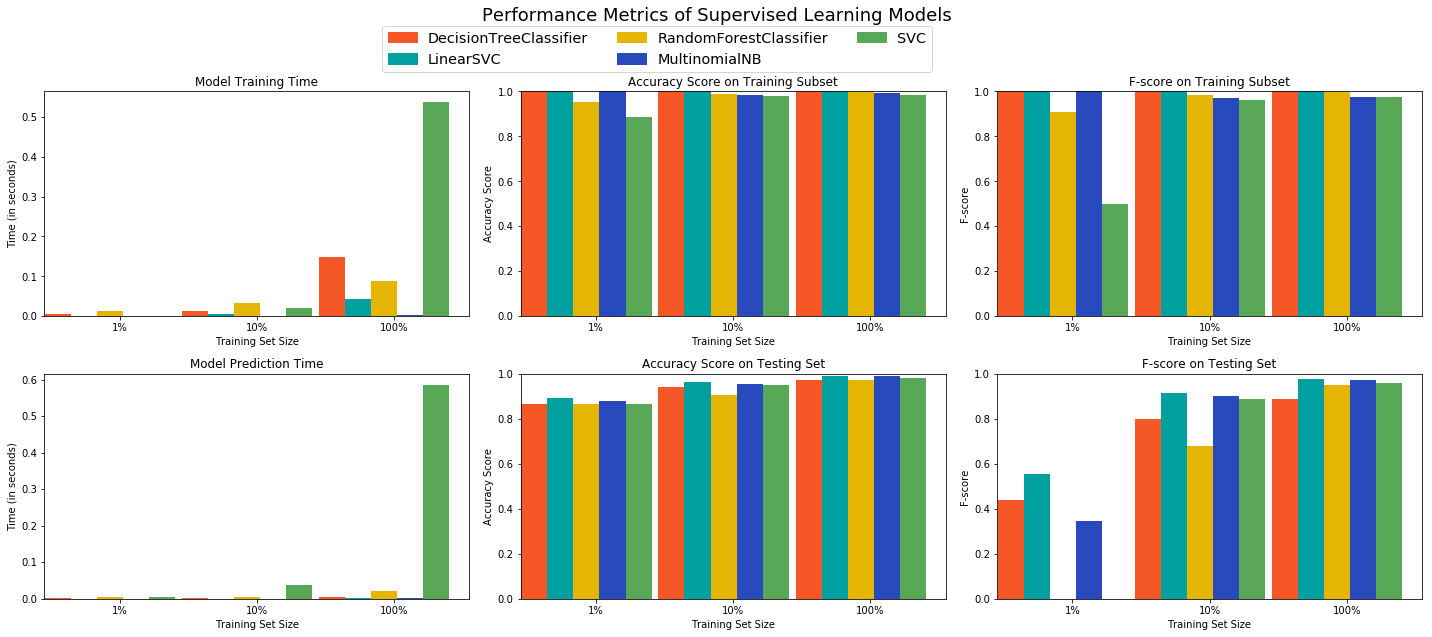

In [54]:
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "sklearn")
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
import math

classifiers=[
DecisionTreeClassifier(random_state=1),
LinearSVC(random_state=1),
RandomForestClassifier(random_state=1),
MultinomialNB(),
SVC(kernel="linear", C=0.025),
GaussianNB(),
SVC(gamma=2, C=1),
AdaBoostClassifier(),
KNeighborsClassifier(),
QuadraticDiscriminantAnalysis(),
MLPClassifier(alpha=1),
GaussianProcessClassifier(),
SGDClassifier(),
GradientBoostingClassifier(),
BaggingClassifier()]

metrics_visualization(classifiers[:5],describe=False)

### Testing

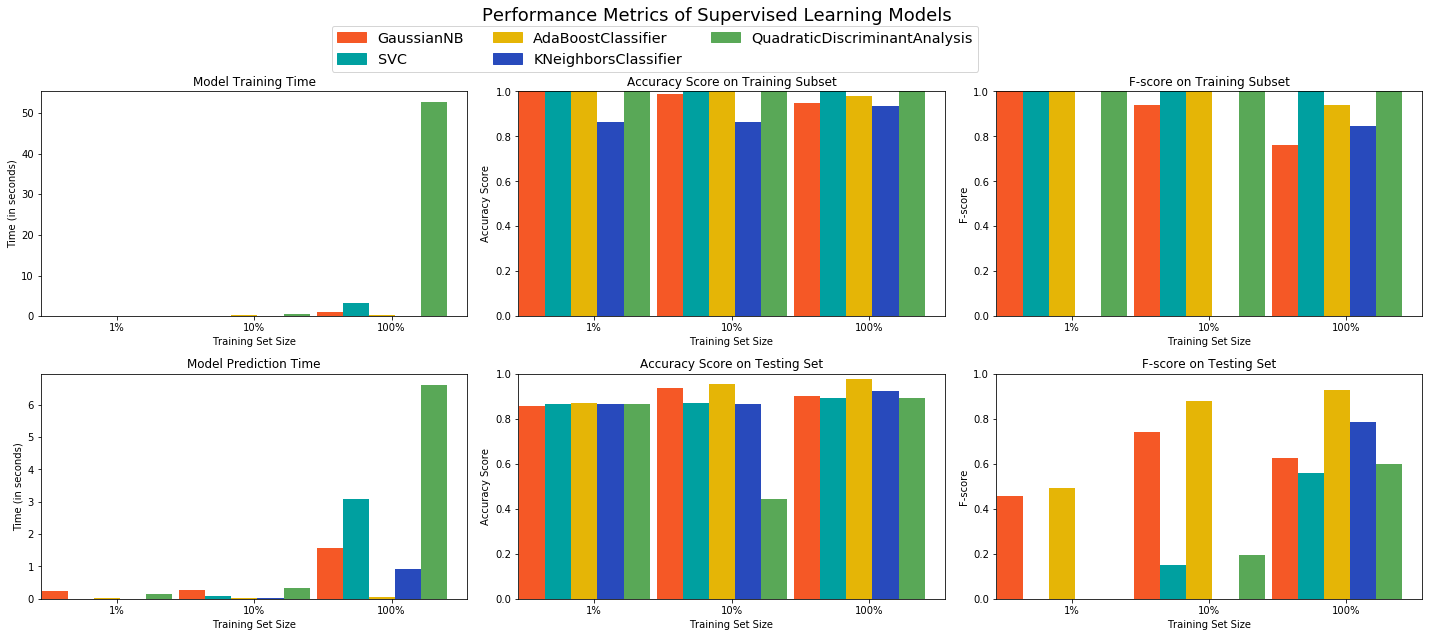

In [55]:
metrics_visualization(classifiers[5:10],describe=False)

MLPClassifier trained on 44 samples.
MLPClassifier trained on 445 samples.
MLPClassifier trained on 4457 samples.
GaussianProcessClassifier trained on 44 samples.
GaussianProcessClassifier trained on 445 samples.
GaussianProcessClassifier trained on 4457 samples.
SGDClassifier trained on 44 samples.
SGDClassifier trained on 445 samples.
SGDClassifier trained on 4457 samples.
GradientBoostingClassifier trained on 44 samples.
GradientBoostingClassifier trained on 445 samples.
GradientBoostingClassifier trained on 4457 samples.
BaggingClassifier trained on 44 samples.
BaggingClassifier trained on 445 samples.
BaggingClassifier trained on 4457 samples.


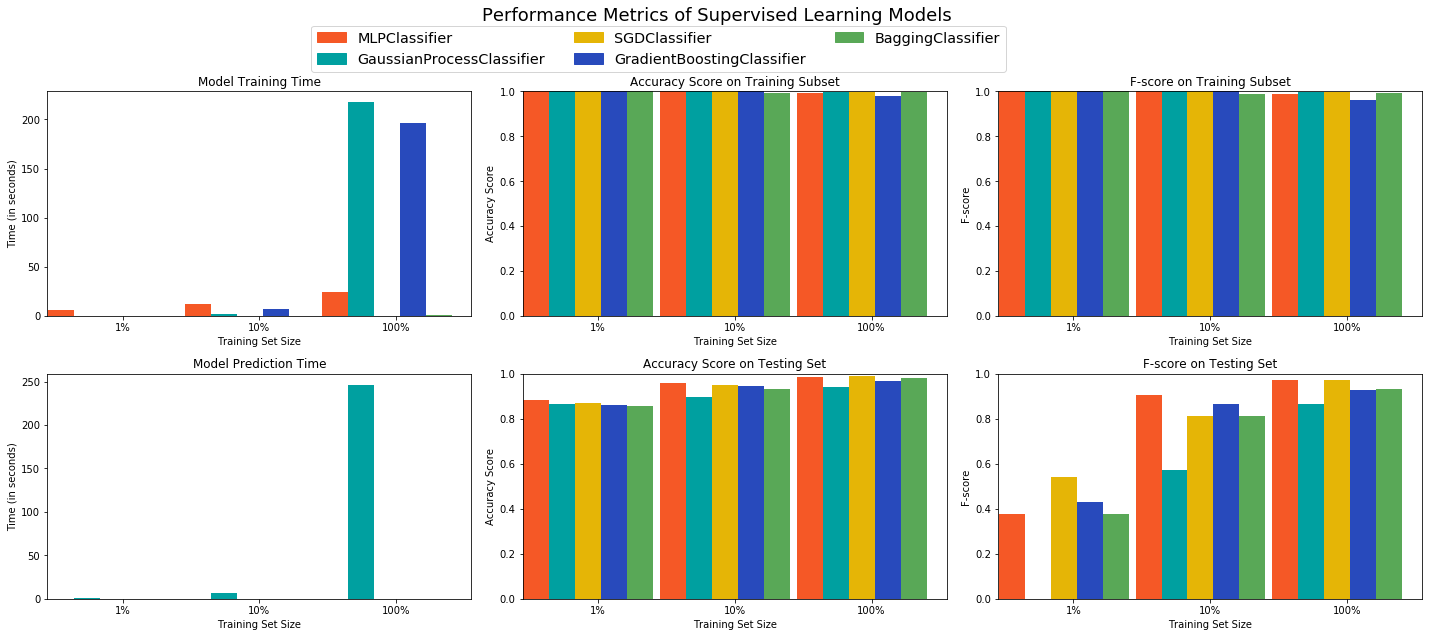

In [39]:
metrics_visualization(classifiers[10:])

Starting


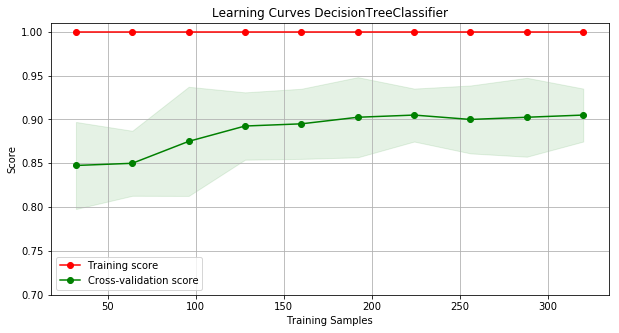

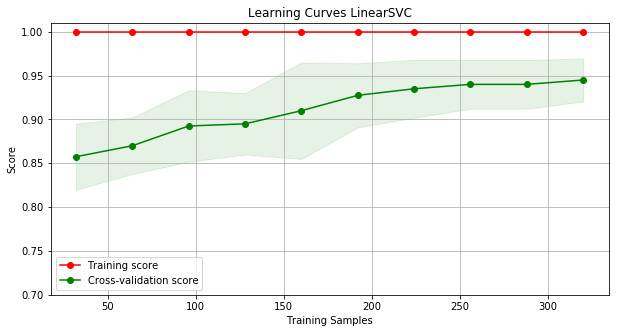

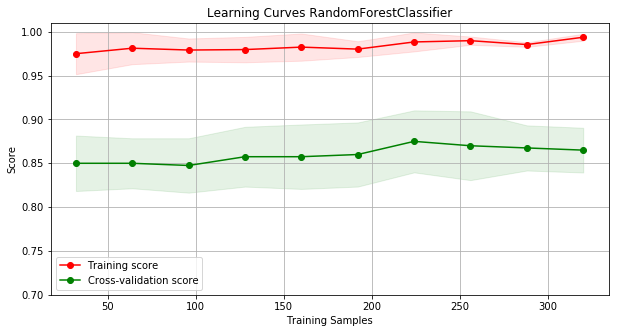

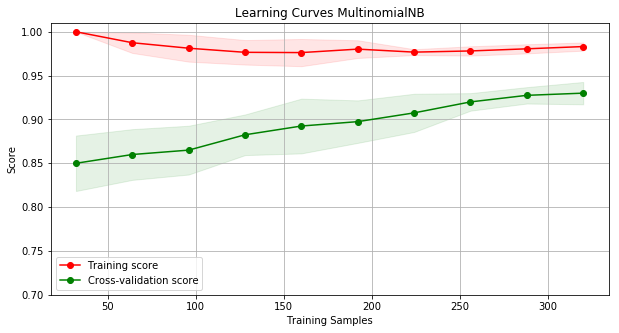

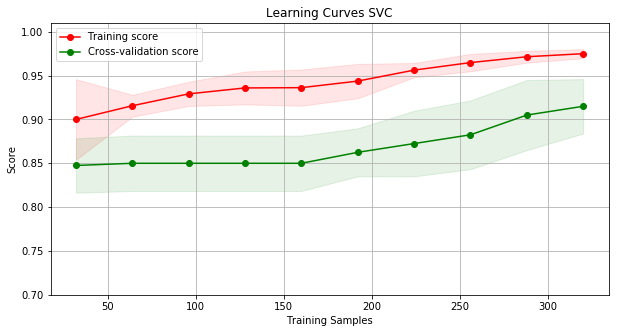

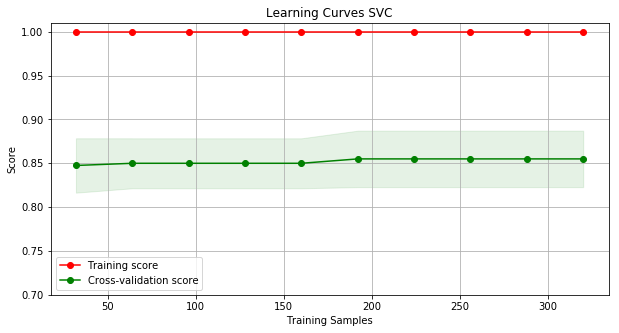

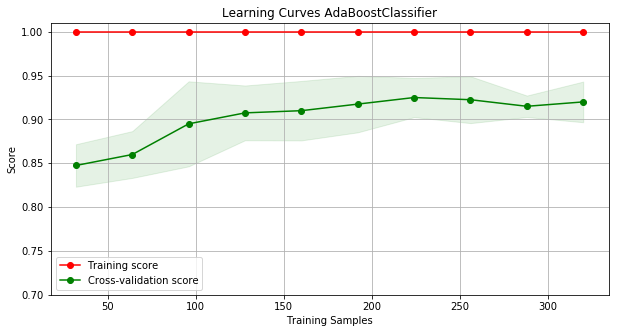

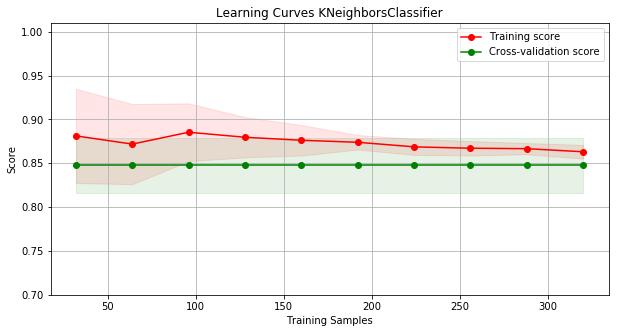

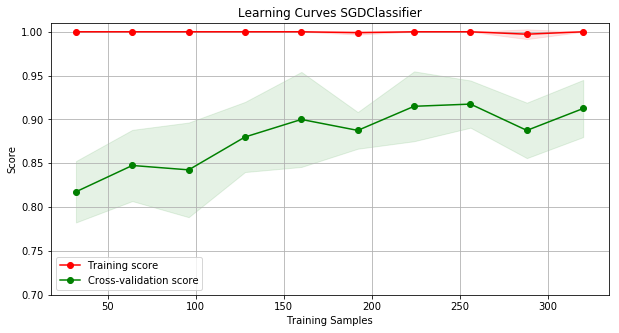

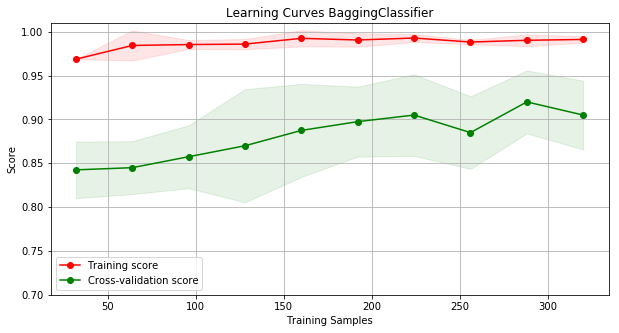

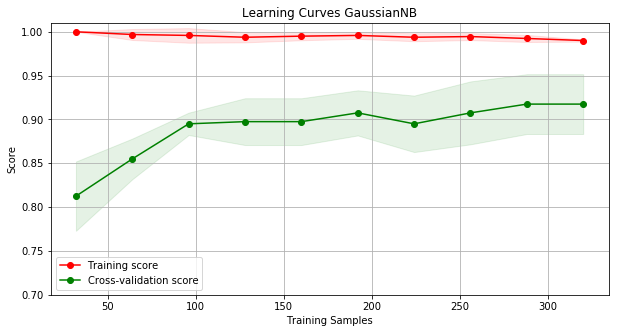

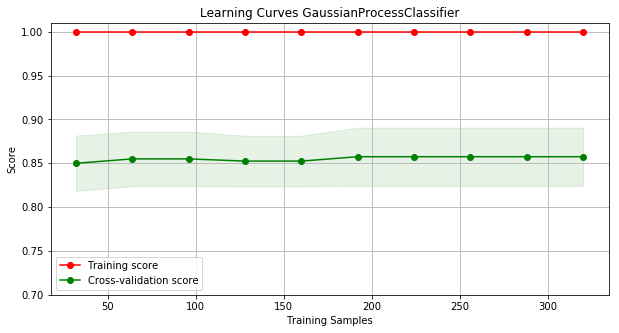

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "sklearn")
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10)):
 
    plt.figure(figsize=(10,5))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training Samples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.figure
    return plt

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
classifiers=[
DecisionTreeClassifier(random_state=1),
LinearSVC(random_state=1),
RandomForestClassifier(random_state=1),
MultinomialNB(),
SVC(kernel="linear", C=0.025),
SVC(gamma=2, C=1),
AdaBoostClassifier(),
KNeighborsClassifier(),
SGDClassifier(),
BaggingClassifier()]

classifiers1=[GaussianNB(),
GaussianProcessClassifier()]
requires_dense_array=['QuadraticDiscriminantAnalysis','GaussianNB','GaussianProcessClassifier',
                      'GradientBoostingClassifier']
for clfr in classifiers:
    title="Learning Curves "+clfr.__class__.__name__
    plot_learning_curve(clfr, title, traing_data[:400], y_train[:400], ylim=(0.7, 1.01), cv=cv, n_jobs=4)
    plt.show()

for clfr in classifiers1:
    title="Learning Curves "+clfr.__class__.__name__
    plot_learning_curve(clfr, title, traing_data[:400].todense(), 
                            y_train[:400], ylim=(0.7, 1.01), cv=cv, n_jobs=4)
    plt.show()
    
       
